This Python code was developed for post-processing PnET modeling results. 

In [1]:
# imports and general settings
import os

import csv
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime

import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import *

import matplotlib.dates as mdates
import matplotlib 

from matplotlib import gridspec

from scipy.optimize import curve_fit

from scipy.optimize import minimize
from scipy import interpolate
from scipy.interpolate import interp1d

import pdb



# matplotlib.style.use('ggplot')

pd.options.mode.chained_assignment = None  # default='warn' 


# Working directory settings

# data directory
wdd = r'..\Result\Site' ## PnET modeling results
wdd_in = r'..\Input'  ## PnET input data


# results directory

# get current directory 
path = os.getcwd() 
# parent directory 
parent = os.path.dirname(path) 

wdr = os.path.join(parent,"PnET_JPy_Results") ## PnET python results directory


print (path)

C:\Users\zzhou\zzhou\Work\PnET - Python\PYnET-master\pnet_python


In [6]:
################ 
# Run PnET python version
################
#from pnet_ii import pnet_ii

!python pnet_ii.py

#pnet_ii()


    
        


       



**********
Model PnET II run ends!!!



PnET II runs on:Year DOY ystep 1727 196 21
PnET II runs on:Year DOY ystep 1727 227 21
PnET II runs on:Year DOY ystep 1727 258 21
PnET II runs on:Year DOY ystep 1727 288 21
PnET II runs on:Year DOY ystep 1727 319 21
PnET II runs on:Year DOY ystep 1727 349 22
PnET II runs on:Year DOY ystep 1728 15 22
PnET II runs on:Year DOY ystep 1728 46 22
PnET II runs on:Year DOY ystep 1728 74 22
PnET II runs on:Year DOY ystep 1728 105 22
PnET II runs on:Year DOY ystep 1728 135 22
PnET II runs on:Year DOY ystep 1728 166 22
PnET II runs on:Year DOY ystep 1728 196 22
PnET II runs on:Year DOY ystep 1728 227 22
PnET II runs on:Year DOY ystep 1728 258 22
PnET II runs on:Year DOY ystep 1728 288 22
PnET II runs on:Year DOY ystep 1728 319 22
PnET II runs on:Year DOY ystep 1728 349 23
PnET II runs on:Year DOY ystep 1729 15 23
PnET II runs on:Year DOY ystep 1729 46 23
PnET II runs on:Year DOY ystep 1729 74 23
PnET II runs on:Year DOY ystep 1729 105 23
PnET II runs on:Year DOY ystep 1729 135 23
PnET II runs on:

In [32]:
################ 
# Read files


file_clm= '\\climate_python.csv'
file_annual = '\\Output_annual.csv'
file_monthly = '\\Output_monthly.csv'   


file_clm= wdd_in + file_clm
file_annual = wdd + file_annual
file_monthly = wdd + file_monthly


climate = pd.read_csv(file_clm )
annual = pd.read_csv(file_annual,skiprows=[1])  ## skip the unit row
# annual = pd.read_csv(file_annual)  ## skip the unit row
monthly = pd.read_csv(file_monthly,skiprows=[1])


climate.columns = climate.columns.str.lstrip()
annual.columns = annual.columns.str.lstrip()
monthly.columns = monthly.columns.str.lstrip()



print (climate.columns) ## show the column names
# print annual.dtypes ## show the column names
print (climate.head(3)) ## Return the first n rows.



Index(['year', 'doy', 't_max', 't_min', 'par', 'precip', 'o3', 'co2_atm',
       'nh4_dep', 'no3_dep'],
      dtype='object')
   year  doy   t_max  t_min      par  precip     o3  co2_atm  nh4_dep  \
0  1706   15   4.490 -4.900  276.959    6.28  0.000  282.506  0.00928   
1  1706   46   6.672 -2.455  302.855    3.15  0.000  282.506  0.00928   
2  1706   74  12.077  2.016  474.568    5.06  0.048  282.506  0.00928   

    no3_dep  
0  0.003227  
1  0.003227  
2  0.003227  


Index(['Year', 'DOY', 'MaxT', 'MinT', 'PAR', 'Precip', 'O3', 'CO2', 'NH4',
       'NO3'],
      dtype='object')


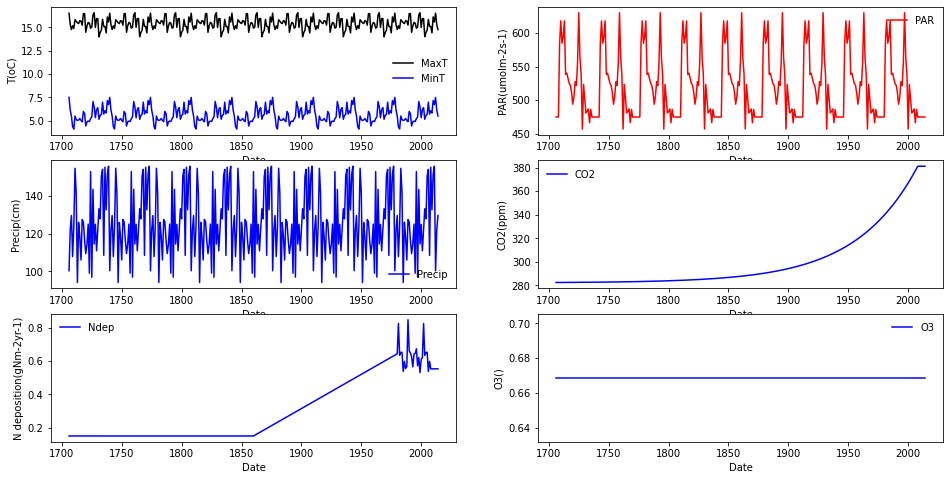

In [33]:
## plot climate to check if data are normal

climate.rename(columns={'year': "Year",
                        "doy": "DOY",
                        "t_max": "MaxT",
                        "t_min": "MinT",
                        "par": "PAR",
                        "precip": "Precip",
                        "o3": "O3",
                        "co2_atm": "CO2",
                        "nh4_dep": "NH4",
                        "no3_dep": "NO3"                      
                       }, inplace=True)

print (climate.columns)
       
climate['decidate'] = climate.Year + climate.DOY/365
climate['Ndep'] = climate.NH4 + climate.NO3

### get yearly values
climate_yr = climate.groupby( 'Year').agg(
    {'MaxT':'mean',     
     'MinT':'mean',
     'PAR':'mean',
     'Precip':'sum',
     'O3':'mean',     
     'CO2':'mean',
    'NH4':'sum',
    'NO3':'sum',
     'Ndep':'sum'
     
    }).reset_index()

# print climate_yr.head(3) ## Return the first n rows.



fig,axes = plt.subplots(3,2)
fig.set_size_inches(16, 8)

#### temperature

ax =axes[0,0]
x= climate_yr.Year
y = climate_yr.MaxT


ax.plot(x, y,c="black",label = 'MaxT')


y = climate_yr.MinT
ax.plot(x, y,c="blue",label = 'MinT')

ax.set_xlabel('Date')
ax.set_ylabel('T(oC)')

# ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)


#### PAR
ax =axes[0,1]
x= climate_yr.Year
y = climate_yr.PAR


ax.set_xlabel('Date')
ax.set_ylabel('PAR(umolm-2s-1)')
ax.plot(x, y,c="red",label = 'PAR')

# ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)



#### Preci
ax =axes[1,0]
x= climate_yr.Year
y = climate_yr.Precip


ax.set_xlabel('Date')
ax.set_ylabel('Precip(cm)')
ax.plot(x, y,c="blue",label = 'Precip')

# ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)


#### CO2
ax =axes[1,1]
x= climate_yr.Year
y = climate_yr.CO2


ax.set_xlabel('Date')
ax.set_ylabel('CO2(ppm)')
ax.plot(x, y,c="blue",label = 'CO2')

# ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)


#### N deposition
ax =axes[2,0]
x= climate_yr.Year
y = climate_yr.Ndep


ax.set_xlabel('Date')
ax.set_ylabel('N deposition(gNm-2yr-1)')
ax.plot(x, y,c="blue",label = 'Ndep')

# ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)

#### O3
ax =axes[2,1]
x= climate_yr.Year
y = climate_yr.O3


ax.set_xlabel('Date')
ax.set_ylabel('O3()')
ax.plot(x, y,c="blue",label = 'O3')

# ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)

plt.show()


file_out = "\\fig_climate.jpg"
file_out = wdr + file_out 
fig.savefig(file_out, format='jpg', dpi=300,bbox_inches="tight")



AttributeError: 'DataFrame' object has no attribute 'NDrain'

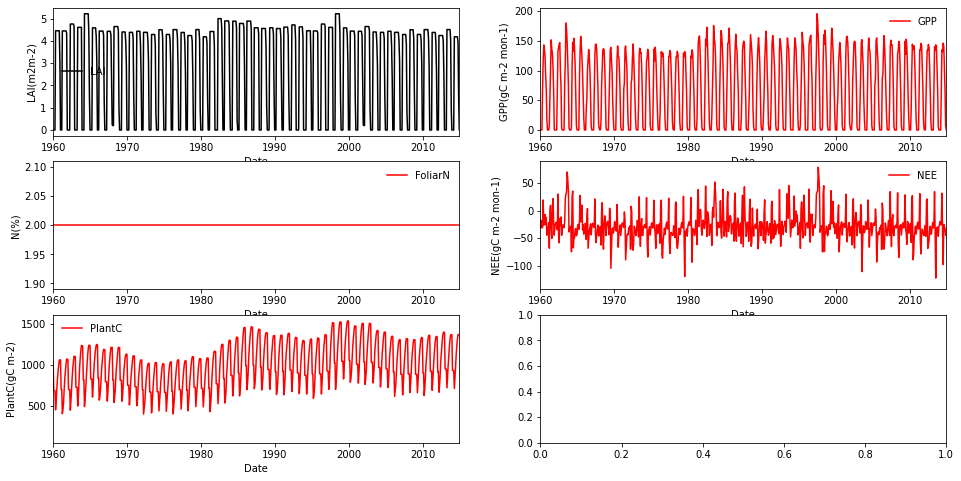

In [34]:
## plot monthly series to check if modeling are normal
## GPP, LAI, 
monthly['decidate'] = monthly.year + monthly.doy/365




fig,axes = plt.subplots(3,2)
fig.set_size_inches(16, 8)

#### LAI

ax =axes[0,0]
x= monthly.decidate
y = monthly.LAI


ax.plot(x, y,c="black",label = 'LAI')


ax.set_xlabel('Date')
ax.set_ylabel('LAI(m2m-2)')

ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)


#### GPP
ax =axes[0,1]
x= monthly.decidate
y = monthly.GrsPsnMo


ax.set_xlabel('Date')
ax.set_ylabel('GPP(gC m-2 mon-1)')
ax.plot(x, y,c="red",label = 'GPP')

ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)



#### FoliarN
ax =axes[1,0]
x= monthly.decidate
y = monthly.FoliarN


ax.set_xlabel('Date')
ax.set_ylabel('N(%)')
ax.plot(x, y,c="red",label = 'FoliarN')

ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)

#### NEE
ax =axes[1,1]
x= monthly.decidate
y = monthly.NEE


ax.set_xlabel('Date')
ax.set_ylabel('NEE(gC m-2 mon-1)')
ax.plot(x, y,c="red",label = 'NEE')

ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)

#### PlantC
ax =axes[2,0]
x= monthly.decidate
y = monthly.PlantC


ax.set_xlabel('Date')
ax.set_ylabel('PlantC(gC m-2)')
ax.plot(x, y,c="red",label = 'PlantC')

ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)

#### NDrain
ax =axes[2,1]
x= monthly.decidate
y = monthly.NDrain


ax.set_xlabel('Date')
ax.set_ylabel('NDrain(gN m-2 mon-1)')
ax.plot(x, y,c="red",label = 'NDrain')

ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)
plt.show()


file_out = "\\fig_climate.jpg"
file_out = wdr + file_out 
fig.savefig(file_out, format='jpg', dpi=300,bbox_inches="tight")




   year  folm      nppfol     nppwood     npproot         psn         nep  \
0  1707   0.0  289.821364  606.475508  260.385064  463.384487 -507.036992   
1  1708   0.0  284.064867  541.292250  245.443888  469.622451 -454.414255   
2  1709   0.0  292.071032  492.869103  250.264707  541.202921 -269.116888   
3  1710   0.0  313.083750  486.252925  260.969470  579.029984 -291.647933   

          gpp    prec     evap      trans       drain  wtrstress  decresp  v1  \
0  646.349362  121.80  13.3980  23.939961  100.834787        1.0        0   0   
1  642.138010  129.58  14.2538  22.817445  112.269576        1.0        0   0   
2  712.012680  107.85  11.8635  30.137334  121.382906        1.0        0   0   
3  750.830834  123.83  13.6213  29.059375   98.499870        1.0        0   0   

   v2  
0   1  
1   1  
2   1  
3   1  


AttributeError: 'DataFrame' object has no attribute 'livewoodm'

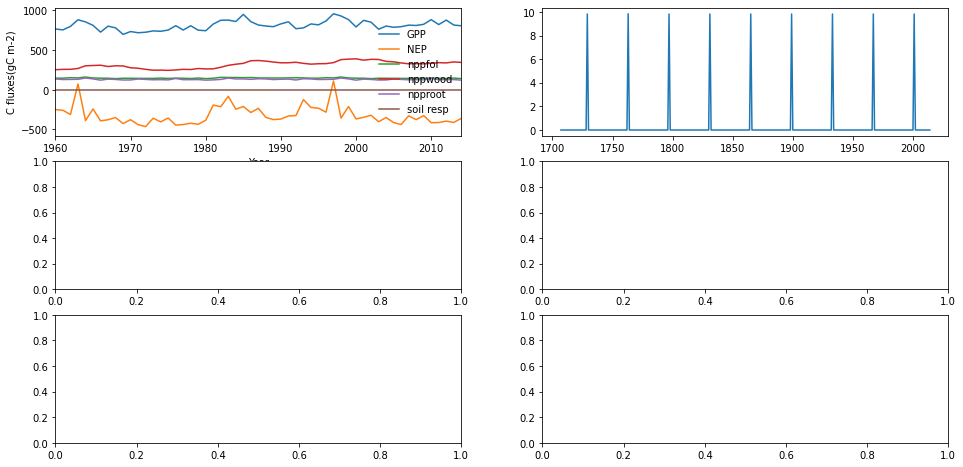

In [36]:
## plot yealy series to check if modeling are normal
##  



fig,axes = plt.subplots(3,2)
fig.set_size_inches(16, 8)
print (annual.head(4))

#### Carbon

ax =axes[0,0]
x= annual.year

y =annual.gpp
ax.plot(x, y,label = 'GPP')


y =annual.nep
ax.plot(x, y,label = 'NEP')

y =annual.nppfol*0.5
ax.plot(x, y,label = 'nppfol')
y =annual.nppwood*0.5
ax.plot(x, y,label = 'nppwood')
y =annual.npproot*0.5
ax.plot(x, y,label = 'npproot')
y =annual.decresp
ax.plot(x, y,label = 'soil resp')


ax.set_xlabel('Year')
ax.set_ylabel('C fluxes(gC m-2)')

ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)



#### Carbon pools

ax =axes[0,1]
x= annual.year

y =annual.folm*0.5
ax.plot(x, y,label = 'folm')

y =annual.livewoodm*0.5
ax.plot(x, y,label = 'livewoodm')

y =annual.deadwoodm*0.5
ax.plot(x, y,label = 'deadwoodm')

y =annual.rootm*0.5
ax.plot(x, y,label = 'rootm')

y =annual.som*0.5
ax.plot(x, y,label = 'som')



ax.set_xlabel('Year')
ax.set_ylabel('C pools(gC m-2)')

ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)


#### Nitrogen
ax =axes[1,0]
x= annual.year


y= annual.ndep
ax.plot(x, y,label = 'ndep')

y =annual.ndrain
ax.plot(x, y,label = 'ndrain')

y = annual.netnmin
ax.plot(x, y,label = 'netnmin')

y = annual.netnitrif
ax.plot(x, y,label = 'netnitrif')


ax.set_xlabel('Year')
ax.set_ylabel('N fluxes(gN m-2)')


ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)


#### Nitrogen 
ax =axes[1,1]
x= annual.year


y= annual.foln
ax.plot(x, y,label = 'foln')

y =annual.ndrain
ax.plot(x, y,label = 'ndrain')

y = annual.nratio
ax.plot(x, y,label = 'nratio')

y = annual.plantnYr
ax.plot(x, y,label = 'plantnYr')


ax.set_xlabel('Year')
ax.set_ylabel('N variable')


ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)


#### PlantC
ax =axes[2,0]
x= annual.year

y = annual.plantc
ax.plot(x, y,label = 'plantc')

y = annual.budc
ax.plot(x, y,label = 'budc')

y = annual.woodc
ax.plot(x, y,label = 'woodc')

y = annual.rootc
ax.plot(x, y,label = 'rootc')

ax.set_xlabel('Date')
ax.set_ylabel('C(gC m-2)')
ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)

#### Water
ax =axes[2,1]
x= annual.year


y = annual.prec
ax.plot(x, y,label = 'prec')

y = annual.evap
ax.plot(x, y,label = 'evap')

y = annual.trans
ax.plot(x, y,label = 'trans')

y = annual.drain
ax.plot(x, y,label = 'drain')



ax.set_xlabel('Date')
ax.set_ylabel('Water flux(cm)')


ax.set_xlim(1960,x.max())
ax.legend(loc='best',frameon=False)


plt.show()


file_out = "\\fig_climate.jpg"
file_out = wdr + file_out 
fig.savefig(file_out, format='jpg', dpi=300,bbox_inches="tight")


